In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [74]:
import pandas as pd
import numpy as np

In [26]:
from matplotlib import pyplot as plt

In [1]:
winequality_red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
winequality_white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [59]:
red_wine_df = pd.read_csv(winequality_red_url, delimiter=';')

In [60]:
red_wine_df = red_wine_df.sort_values(by=['quality'])
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


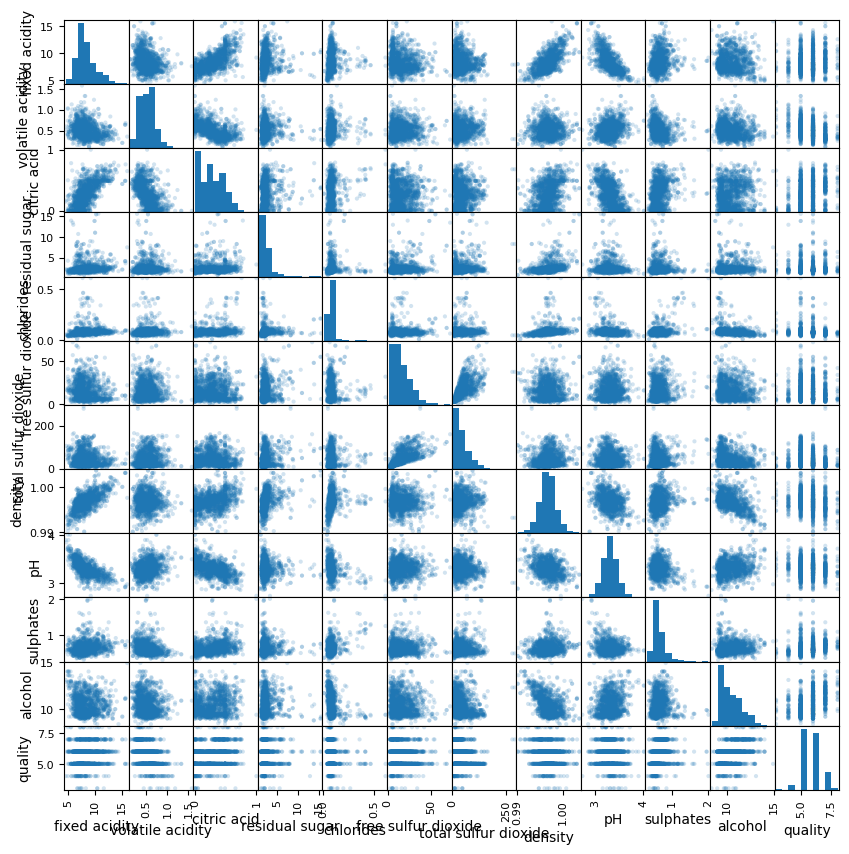

In [61]:
_ = pd.plotting.scatter_matrix(red_wine_df, alpha=0.2, figsize=(10,10))

In [62]:
target_red_wine_df = red_wine_df.pop('quality')
X = red_wine_df.values
y = target_red_wine_df.values

In [63]:
model = LinearRegression()

In [68]:
model.fit(X=X, y=y)
model.score(X=X, y=y)

0.3605517030386879

In [69]:
y_pred = model.predict(X)

In [72]:
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

intercept_ = model.intercept_
coef = model.coef_
print("Intercept:", intercept_)
print("Coef:", coef)

MSE: 0.416767167221408
Intercept: 21.965208449448667
Coef: [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]


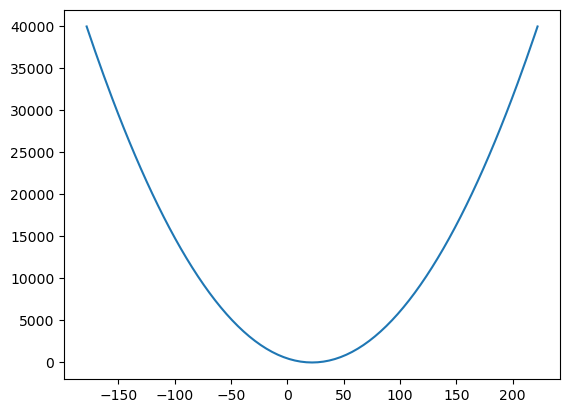

In [75]:
delta = 200
intercepts = np.linspace(intercept_ - delta, intercept_+ delta, 159)
mses = []
for intercept in intercepts:
  model.intercept_ = intercept
  ypred = model.predict(X)
  mse = mean_squared_error(y, ypred)
  mses.append(mse)
plt.plot(intercepts, mses)
plt.show()